In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
len(x_train)

60000

In [34]:
len(x_test)

10000

In [35]:
x_train[0].shape

(28, 28)

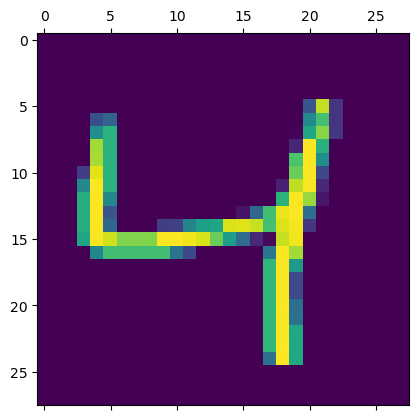

In [36]:
plt.matshow(x_train[2])

In [37]:
y_train[2]

4

In [38]:
x_train = x_train / 255
x_test = x_test / 255

In [39]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_train_flattened.shape

(60000, 784)

In [40]:
x_test_flattened.shape

(10000, 784)

In [41]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
model = keras.Sequential([
  keras.layers.Dense(10, input_shape=(784,),activation="sigmoid")  
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4700 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9256


In [43]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.9241


[0.27065709233283997, 0.9240999817848206]

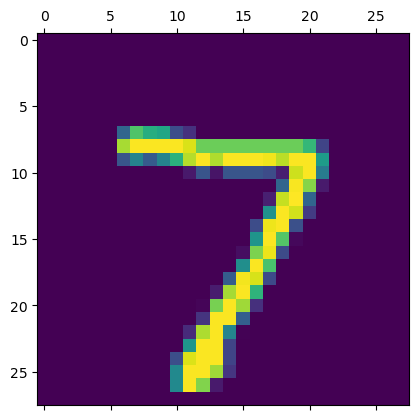

In [44]:
plt.matshow(x_test[0])

In [45]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.5858082e-02, 3.0280205e-07, 4.3540314e-02, 9.5791829e-01,
       2.4234580e-03, 9.8021090e-02, 9.8285932e-07, 9.9987584e-01,
       8.6209781e-02, 5.8003682e-01], dtype=float32)

In [46]:
np.argmax(y_predicted[0])

7

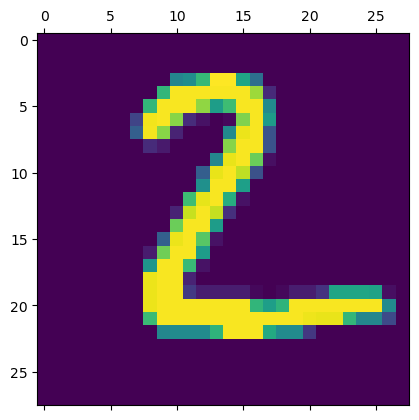

In [47]:
plt.matshow(x_test[1])

In [48]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([3.5021904e-01, 6.0569020e-03, 9.9952984e-01, 5.2422446e-01,
       6.4966649e-10, 8.7116969e-01, 8.9891344e-01, 1.1020535e-12,
       2.4704081e-01, 3.7647410e-09], dtype=float32)

In [49]:
np.argmax(y_predicted[1])

2

In [50]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [52]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    5,    8,    3,    3,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  909,   24,    9,    2,   13,   12,   46,    3],
       [   1,    0,   12,  943,    0,   16,    2,   12,   18,    6],
       [   1,    1,    2,    2,  919,    0,   12,    5,    9,   31],
       [   8,    3,    1,   46,   11,  760,   15,   10,   32,    6],
       [   8,    3,    3,    2,    7,   10,  920,    2,    3,    0],
       [   1,    5,   21,    8,    7,    0,    0,  964,    3,   19],
       [   4,    7,    7,   28,    9,   24,    9,   14,  867,    5],
       [  10,    7,    1,   13,   33,    6,    0,   42,    6,  891]])>

Text(95.72222222222221, 0.5, 'Truth')

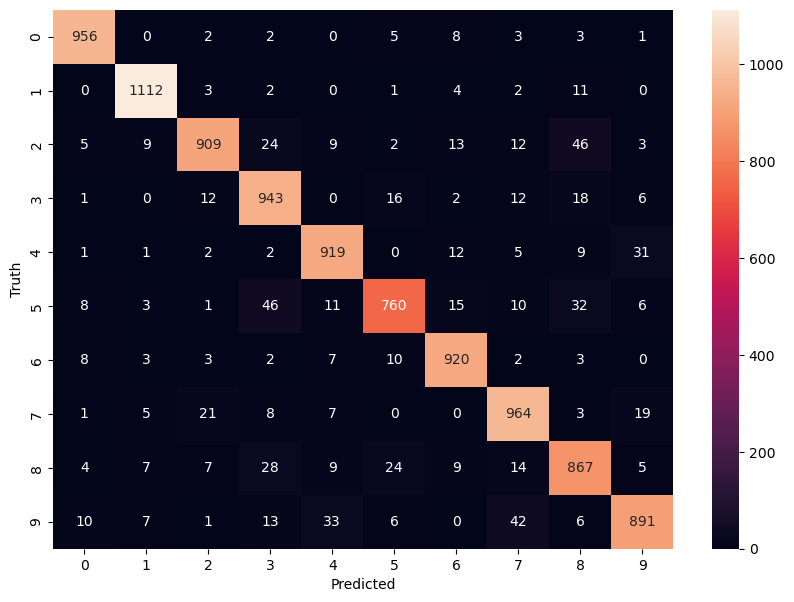

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation="relu"),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2731 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1255 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0653 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9842


In [55]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9764


[0.07416423410177231, 0.9764000177383423]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

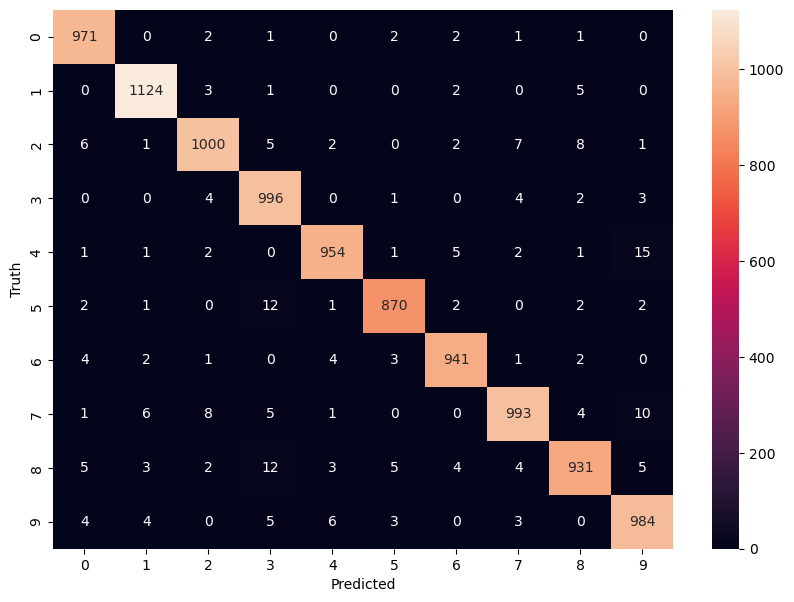

In [56]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
# if we do not wish to make the falttened array then we can just add one the statementas follows.
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation="relu"),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2708 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0658 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9839
